<a href="https://colab.research.google.com/github/ermax775/LSTM-TimeSeries1/blob/main/VARtest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive')
!ls

'Colab Notebooks'
 GEE
'How to get started with Drive.pdf'
 test4a.csv
 test4.csv
 test6.csv
'Tyrranical TPLF.doc'
'Tyrranical TPLF Rule and the Agony of the Ethiopians.docx'


In [ ]:
filepath = 'test7.csv'
macro_data = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
print(macro_data.shape)  # (49, 4)
macro_data.head()

(123, 4)


,TempMean,PrecipMean,gdfce,Product
Date,,,,
2011-11-01,26.9,32.3,23.1,1606.4
2011-12-01,27.0,32.2,23.4,1637.0
2012-01-01,27.1,32.4,23.4,1629.5
2012-02-01,27.1,32.5,23.8,1643.4
2012-03-01,27.2,32.4,23.8,1671.6


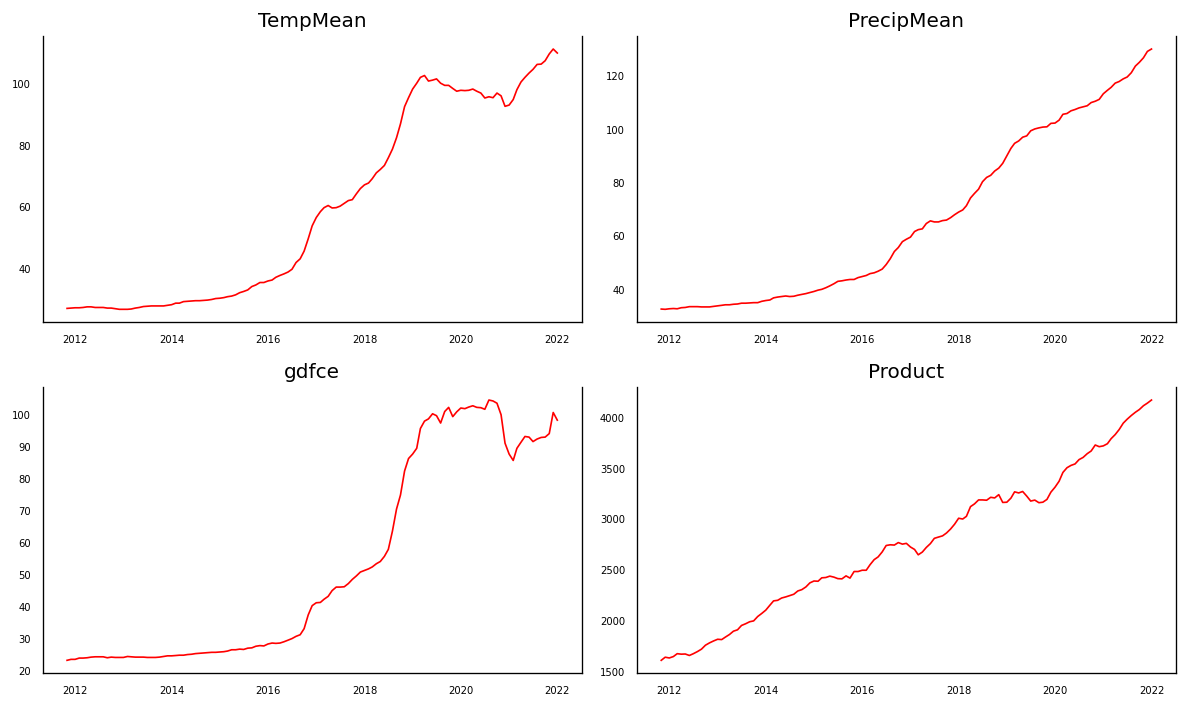

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
ad_fuller_result_1 = adfuller(macro_data['PrecipMean'].diff()[1:])

print('realPrecip')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['TempMean'].diff()[1:])

print('realTemp')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realPrecip
ADF Statistic: -1.823665760965292
p-value: 0.36877719974178913

---------------------

realTemp
ADF Statistic: -4.244421412664248
p-value: 0.000553653708669569


In [ ]:
print('Precipitation causes Temperature Flactuation?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['TempMean', 'PrecipMean']], 4)

print('\nTemperature Rise&Fall causes Precipitation(Changes with Rainfall amount)?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['PrecipMean', 'TempMean']], 4)

Precipitation causes Temperature Flactuation?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5123  , p=0.4755  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=0.5252  , p=0.4686  , df=1
likelihood ratio test: chi2=0.5241  , p=0.4691  , df=1
parameter F test:         F=0.5123  , p=0.4755  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0256  , p=0.0204  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=8.3982  , p=0.0150  , df=2
likelihood ratio test: chi2=8.1196  , p=0.0173  , df=2
parameter F test:         F=4.0256  , p=0.0204  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0882  , p=0.0301  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=9.8385  , p=0.0200  , df=3
likelihood ratio test: chi2=9.4560  , p=0.0238  , df=3
parameter F test:         F=3.0882  , p=0.0301  , df_denom=113, df_num=3

Granger Causality
number of

In [ ]:
macro_data = macro_data[['TempMean','PrecipMean']]
print(macro_data.shape)

(123, 2)


In [ ]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [ ]:
print(test_df.shape)

(12, 2)


In [ ]:
model = VAR(train_df.diff()[1:])

In [ ]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0     -0.05524   0.0003082      0.9463    -0.03284
1       -1.007    -0.8404*      0.3653    -0.9398*
2      -0.9615     -0.6837      0.3824     -0.8495
3      -0.9937     -0.6048      0.3705     -0.8368
4       -1.009     -0.5095      0.3649     -0.8078
5      -0.9603     -0.3493      0.3837     -0.7139
6      -0.9211     -0.1990      0.3997     -0.6299
7      -0.9803     -0.1470      0.3776     -0.6442
8       -1.011    -0.06649      0.3673     -0.6300
9      -0.9774     0.07811      0.3812     -0.5517
10     -0.9388      0.2278      0.3980     -0.4684
11     -0.8712      0.4065      0.4283     -0.3560
12     -0.9234      0.4654      0.4093     -0.3633
13     -0.9149      0.5850      0.4161     -0.3100
14     -0.9582      0.6528      0.4023     -0.3086
15     -0.9532      0.7689      0.4088     -0.2587
16      -1.037      0.7957     

In [ ]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                               Statespace Model Results                               
Dep. Variable:     ['TempMean', 'PrecipMean']   No. Observations:                  111
Model:                                 VAR(4)   Log Likelihood                -829.486
                                  + intercept   AIC                           1700.971
Date:                        Thu, 03 Feb 2022   BIC                           1757.871
Time:                                19:46:14   HQIC                          1724.054
Sample:                            11-01-2011                                         
                                 - 01-01-2021                                         
Covariance Type:                          opg                                         
Ljung-Box (Q):              370.70, 410.38   Jarque-Bera (JB):         44.55, 74.51
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.47, 5.11   Skew

In [ ]:
#var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
#fitted_model = var_model.fit(disp=False)
#print(fitted_model.summary())

UFuncTypeError: ignored

NameError: ignored

In [ ]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#

predictions=predict.predicted_mean

In [ ]:
predictions.columns=['TempMean_predicted','PrecipMean_predicted']
predictions

,TempMean_predicted,PrecipMean_predicted
2021-02-01,46.128712,57.256452
2021-03-01,66.196897,65.245391
2021-04-01,56.824943,44.983039
2021-05-01,69.089408,57.003879
2021-06-01,77.485685,72.448771
2021-07-01,99.663084,96.584116
2021-08-01,96.853594,110.909891
2021-09-01,91.296554,110.473083
2021-10-01,80.128920,95.779106
2021-11-01,74.561389,86.928642


In [ ]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

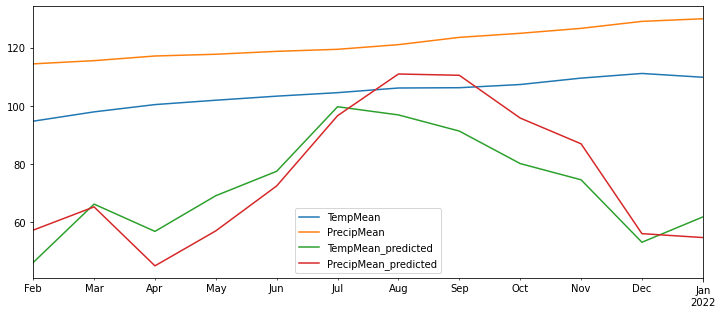

In [ ]:
test_vs_pred.plot(figsize=(12,5))

In [ ]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_ulc=math.sqrt(mean_squared_error(predictions['TempMean_predicted'],test_df['TempMean']))
print('Mean value of TempMean is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['TempMean']),rmse_ulc))

rmse_rgnp=math.sqrt(mean_squared_error(predictions['PrecipMean_predicted'],test_df['PrecipMean']))
print('Mean value of PrecipMean is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['PrecipMean']),rmse_rgnp))

Mean value of TempMean is : 104.39166666666667. Root Mean Squared Error is :35.31547508414271
Mean value of PrecipMean is : 121.475. Root Mean Squared Error is :50.830463062535024
